In [4]:
import pandas as pd

# Read the entire CSV file
df = pd.read_csv("Churn_Modelling.csv")

# Display the entire DataFrame
print(df)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Get numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Impute missing values with mean for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,4,15701354,Boni,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,France,Male,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0
9996,9997,15569892,Johnstone,-1.391939,France,Male,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0
9997,9998,15584532,Liu,0.604988,France,Female,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1
9998,9999,15682355,Sabbatini,1.256835,Germany,Male,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1


In [17]:
import pandas as pd

# Read the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Perform one-hot encoding for 'Geography' and 'Gender' columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Display the resulting DataFrame
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0              False            False        False  
1         

In [18]:
# Create new feature: Balance to Salary ratio
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']


In [19]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,BalanceSalaryRatio
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,0.000000
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,0.744677
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,1.401375
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,0.000000
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,True,0.000000
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True,0.564108
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False,0.000000
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True,0.808230


In [20]:
df = df.iloc[:,:-1]

In [21]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [22]:

description = df.describe()
print(description)


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

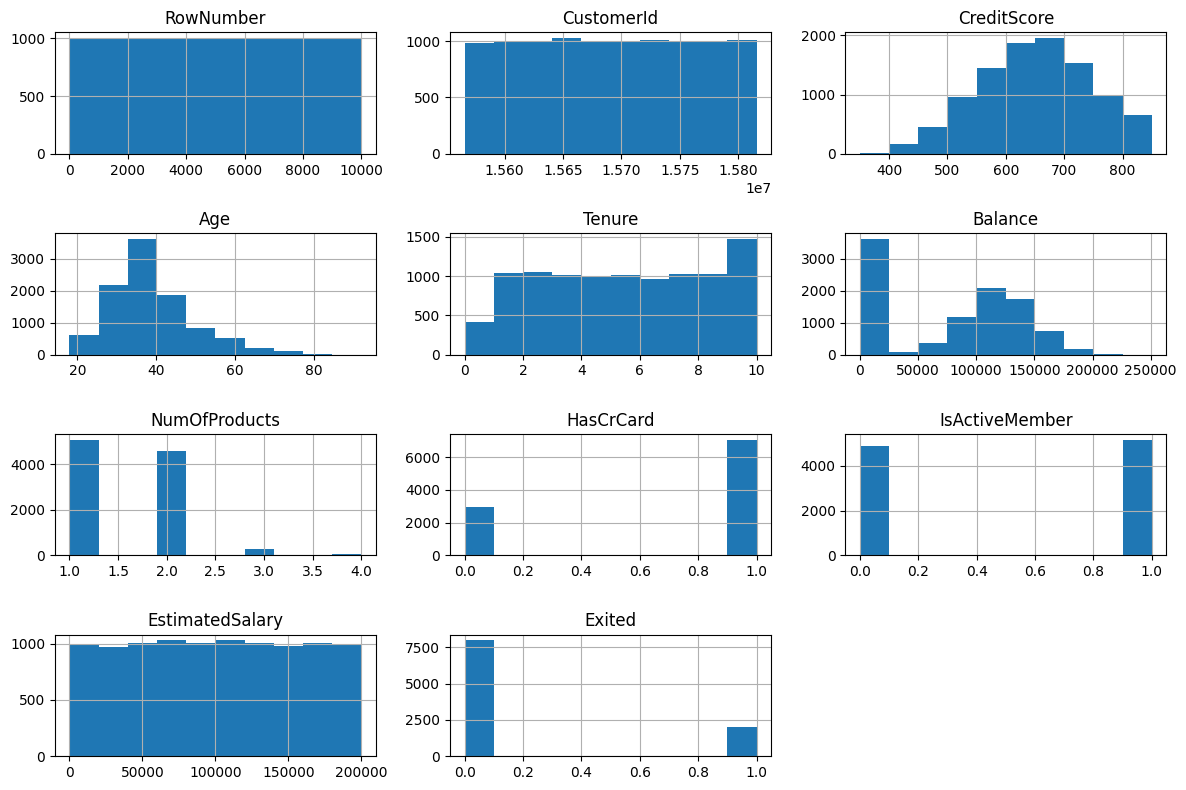

In [23]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


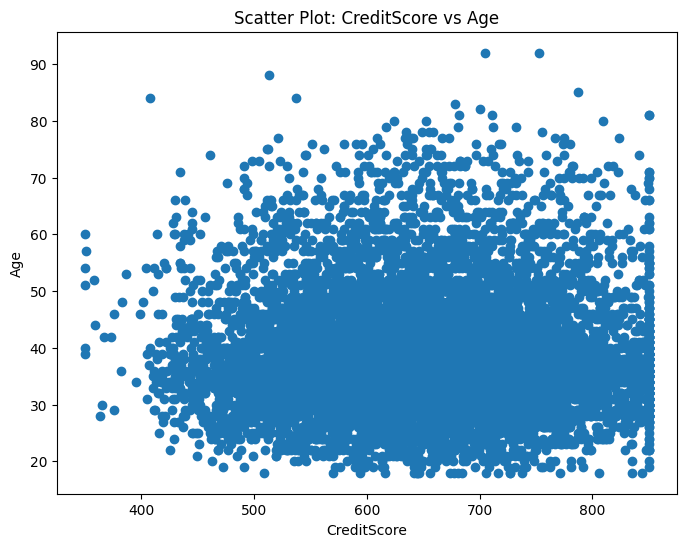

In [29]:
import matplotlib.pyplot as plt
x = df['CreditScore']
y = df['Age']
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('Scatter Plot: CreditScore vs Age')
plt.show()


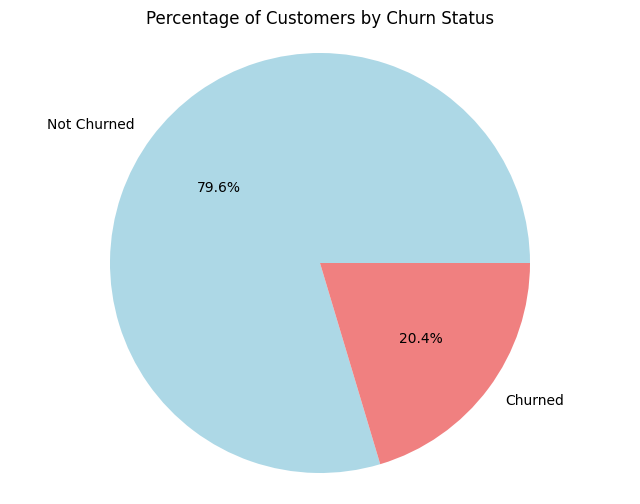

In [38]:
# Calculate the frequency of customers by churn status
churn_counts = df['Exited'].value_counts()
labels = ['Not Churned', 'Churned']
sizes = churn_counts.values

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Percentage of Customers by Churn Status')
plt.axis('equal')
plt.show()


In [40]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset

# Split the dataset into features (X) and target variable (y)
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test ready for model training and evaluation


In [43]:
# Convert non-numeric values to numeric (if any)
# This step is usually not required after one-hot encoding
# It's included here for completeness
df = df.apply(pd.to_numeric, errors='coerce')


In [46]:
X_train = X_train.drop(columns=['Surname'])
X_test = X_test.drop(columns=['Surname'])


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.79


In [57]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)


Support Vector Machine Accuracy: 0.8035


In [62]:
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.8655


In [68]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64